<h1> Epsilon Decay Method </h1>

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

In [9]:
def normalise(array):
    maximum=max(array)
    minimum=min(array)
    for i in range(len(array)):
        array[i]=(array[i]-minimum)/(maximum-minimum)
    return array

In [10]:
def epsilon_greedy_decay(k,iterations,mu='random'):
    
    #k=number of arms
    #iterations= number of pulls of the arms
    #mu=an array of length k, which holds the true expected value of each arm
    #mu="random"-> the expected value is sampled from a normal distribution with standard deviation 1 (default)
    #mu=user defined-> the user sends the true expected values of each arm
    
    if mu=="random":
        mu=np.random.normal(0,1,k) #now mu is an array containing the true expected values of each arm
    if len(mu)!=k: #case wwhen mu is user defined
        print("The length of the entered array of true expected values does not match with the number of arms entered \n")
        return
    
    q=np.zeros(k) #the array of the estimated expected values of each arm
    pulls=0 #number of pulls at current iteration
    arm_pull_number=np.zeros(k) #stores the number of times each arm has been pulled till the current iteration
    reward=0 #the reward earned at the current iteration
    a=0 #the arm pulled at the current iteration
    total_reward=0 #the total rewards won till the current iteration
    avg_reward=np.zeros(iterations) #the average reward per iteration till the current iteration
    beta=1/k #scaling factor
    
    #decayed epsilon=1/(1+n*beta) ->n=steps taken till the current iteration
    
    for step in range(iterations):
        p=np.random.rand() #randomly generates a number between 0 and 1
        
        if p<1/(1+step*beta): #case of exploration
            a=np.random.choice(k) #action is chosen randomly from the k arms
            
        else: #case of exploitation
            a=np.argmax(q) #returns the action with the highest estimated expected value at current iteration
        
        reward=np.random.normal(mu[a],1) #the reward is sampled from the normal distribution with mean equalling the true expected value of arm and a std-dev of 1  
        
        #updating counts
        pulls+=1
        arm_pull_number[a]+=1
        
        #updating the rewards
        total_reward+=reward
        avg_reward[step]=total_reward/pulls
        
        
        #updating the estimated value of arm a pulled at the current iteration
        q[a]=((q[a]*(arm_pull_number[a]-1))+reward)/arm_pull_number[a]
        
    avg_reward=normalise(avg_reward) #fits the average rewards between a scale of 0 and 1
    
    #returns the estimated expected values of the arms after all the iterations and
    #the average normalised reward per iteration at each iteration
    #the number of arm pulls of each arm
    
    return q,avg_reward,arm_pull_number 

In [11]:
def epsilon_greedy(k,eps,iterations,mu='random'):
    
    #k=number of arms
    #eps=exploration fraction-> algorithm will explore with a probability of eps and exploit with a probability of (1-eps)
    #iterations= number of pulls of the arms
    #mu=an array of length k, which holds the true expected value of each arm
    #mu="random"-> the expected value is sampled from a normal distribution with standard deviation 1 (default)
    #mu=user defined-> the user sends the true expected values of each arm
    
    if mu=="random":
        mu=np.random.normal(0,1,k) #now mu is an array containing the true expected values of each arm
    if len(mu)!=k: #case wwhen mu is user defined
        print("The length of the entered array of true expected values does not match with the number of arms entered \n")
        return
    
    q=np.zeros(k) #the array of the estimated expected values of each arm
    pulls=0 #number of pulls at current iteration
    arm_pull_number=np.zeros(k) #stores the number of times each arm has been pulled till the current iteration
    reward=0 #the reward earned at the current iteration
    a=0 #the arm pulled at the current iteration
    total_reward=0 #the total rewards won till the current iteration
    avg_reward=np.zeros(iterations) #the average reward per iteration till the current iteration
    
    for step in range(iterations):
        p=np.random.rand() #randomly generates a number between 0 and 1
        
        if eps==0 and step==0: #eps value indicated exploitation but since the steps are also zero there is no knowledge to exploit-randomly select any arm
            a=np.random.choice(k) #action is chosen
        
        elif p<eps: #case of exploration
            a=np.random.choice(k) #action is chosen randomly from the k arms
            
        else: #case of exploitation
            a=np.argmax(q) #returns the action with the highest estimated expected value at current iteration
        
        reward=np.random.normal(mu[a],1) #the reward is sampled from the normal distribution with mean equalling the true expected value of arm and a std-dev of 1  
        
        #updating counts
        pulls+=1
        arm_pull_number[a]+=1
        
        #updating the rewards
        total_reward+=reward
        avg_reward[step]=total_reward/pulls
        
        
        #updating the estimated value of arm a pulled at the current iteration
        q[a]=((q[a]*(arm_pull_number[a]-1))+reward)/arm_pull_number[a]
        
    avg_reward=normalise(avg_reward) #fits the average rewards between a scale of 0 and 1
    
    #returns the estimated expected values of the arms after all the iterations and
    #the average normalised reward per iteration at each iteration
    #the number of arm pulls of each arm
    
    return q,avg_reward,arm_pull_number 

In [14]:
k=10 #number of arms
episodes=1000 #no of times the total experiments are conducted
iterations=1000 #no of pulls in 1 episode
mu=np.random.normal(0,1,k) #true expected rewards of all the 10 arms-all rewards are sampled from normal distributions with sttd-dev 1 

#long term rewards- avg rewards over all the episodes
reward_1_long=np.zeros(iterations)
reward_decay_long=np.zeros(iterations)


#long term arm pulls- avg number of pulls of each arm over all the episodes
arm_pulls1_long=np.zeros(k)
arm_pulls_decay_long=np.zeros(k)


for i in tqdm(range(episodes)):
    q_1,avg_reward_1,arm_pull_number1=epsilon_greedy(k,0.1,iterations,mu)
    q_decay,avg_reward_decay,arm_pull_number_decay=epsilon_greedy_decay(k,iterations,mu)
    
    #updating the long term rewards
    reward_1_long=reward_1_long+(avg_reward_1-reward_1_long)/(i+1)
    reward_decay_long=reward_decay_long+(avg_reward_decay-reward_decay_long)/(i+1)

    
    #updating the long term arm pulls
    arm_pulls1_long=arm_pulls1_long+(arm_pull_number1-arm_pulls1_long)/(i+1)
    arm_pulls_decay_long=arm_pulls_decay_long+(arm_pull_number_decay-arm_pulls_decay_long)/(i+1)

  0%|                                                                                         | 0/1000 [00:00<?, ?it/s]C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  # Remove the CWD from sys.path while we load stuff.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if __name__ == '__main__':
100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:18<00:00, 53.96it/s]


<h1> Graphical Analysis-Epsilon Decay Method </h1>

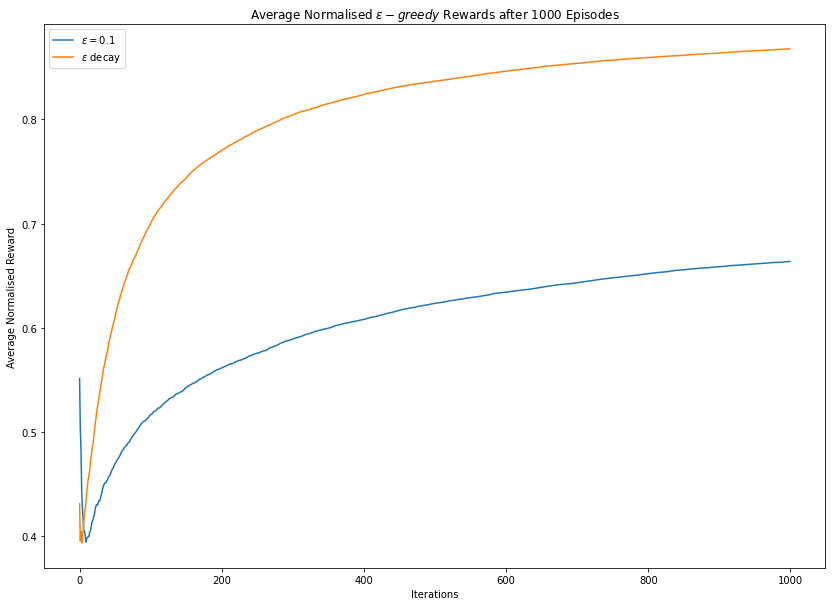

In [15]:
plt.figure(figsize=(14,10))
plt.plot(reward_1_long, label="$\epsilon=0.1$")
plt.plot(reward_decay_long, label="$\epsilon$ decay")
plt.xlabel("Iterations")
plt.ylabel("Average Normalised Reward")
plt.title("Average Normalised $\epsilon-greedy$ Rewards after " + str(episodes) + " Episodes")
plt.legend()
plt.show()

<h1> Quantitative Analysis-Epsilon Decay Method </h1>

In [16]:
print("the most optimal arm: ")
optimal_index=np.argmax(mu) 
optimal_arm=optimal_index+1 #indexing starts from 0
print(optimal_arm)

the most optimal arm: 
9


In [17]:
expected_values=np.vstack((mu,q_1,q_decay))
data=pd.DataFrame(expected_values)
data.columns=["arm "+str(i) for i in range(1,11)]
data.index=["True Expected Reward", "Estimated Expected Reward for $\epsilon=0.1$",
            "Estimated Expected Reward for $\epsilon$ decay"]
data

,arm 1,arm 2,arm 3,arm 4,arm 5,arm 6,arm 7,arm 8,arm 9,arm 10
True Expected Reward,0.519690,0.209794,-0.419145,-0.304001,-1.930538,0.661724,-1.514368,-0.134523,0.877235,0.091729
Estimated Expected Reward for $\epsilon=0.1$,0.628127,0.516962,-0.263537,-0.277994,-1.856048,0.535302,-1.233873,-0.623897,0.866459,-0.078405
Estimated Expected Reward for $\epsilon$ decay,0.654525,0.017389,-0.005402,-0.249022,-2.541031,0.758844,-1.624422,0.496079,0.885694,-0.169458


<h1> Percentage Arm Pulls-Epsilon Decay Method </h1>

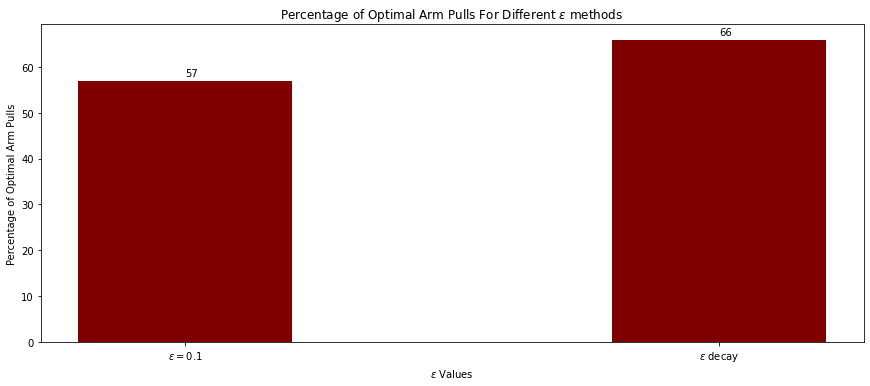

In [18]:
#calculating the percentage optimum arm pulls over the total number of pulls for each epsilon

percent_optimal_pull_1=round((arm_pulls1_long[optimal_index]/np.sum(arm_pulls1_long))*100)
percent_optimal_pull_decay=round((arm_pulls_decay_long[optimal_index]/np.sum(arm_pulls_decay_long))*100)

eps_val = ["$\epsilon=0.1$","$\epsilon$ decay"]
percent_optimal_pull=[percent_optimal_pull_1,percent_optimal_pull_decay]
  
#Creating a figure with some fig size
fig, ax = plt.subplots(figsize = (12,5))
ax.bar(eps_val,percent_optimal_pull,color="maroon",width=0.4)
#plt.text() , you need to give (x,y) location , where you want to put the numbers,
#So here index will give you x pos and data+1 will provide a little gap in y axis.
for index,data in enumerate(percent_optimal_pull):
    plt.text(x=index , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=10))
plt.tight_layout()
plt.xlabel("$\epsilon$ Values")
plt.ylabel("Percentage of Optimal Arm Pulls")
plt.title("Percentage of Optimal Arm Pulls For Different $\epsilon$ methods ")
plt.show()